**Lineare Regression: Boston Housing Dataset**

Dieses Jupyter Notebook präsentiert die Ergenisse des ersten Projektes des Moduls M30: Special Engineering. Thema des ersten Projektes ist die lineare Regression. Als Datenset wird das von sklearn bereitgestellte "Boston Housing Dataset" verwendet.

In [1]:
###############################################################################
# Boston Dataset: lineare Regression
# Sidney Göhler 544131
#### IKT (M)
# Special Engineering SoSe20
# Prof. Dr. Andreas Zeiser
###############################################################################
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.gridspec as gridspec
# import seaborn as sns #pip install searborn
import lineare_regression as lr
from sklearn.datasets import load_boston
from itertools import chain, combinations_with_replacement, product

In [10]:
#############################################
# Hilfsfunktionen
#############################################


def printhead(prefix="", array=None, lab=None):
    df = pd.DataFrame(array, columns=lab)
    print(prefix)
    print(train.head())
    print("shape: ", train.shape)
    print()


def columnNames(listToExtend, degree):
    list = []
    label = ""
    combinations = chain.from_iterable(
        combinations_with_replacement(listToExtend, i)
        for i in range(1, degree + 1))

    for combi in combinations:
        # print(combi)
        for c in combi:
            label = label + str(c)

        list.append(label)
        label = ""

    return list
        

def linear(hyperparameter):

   # if not all(type(i) in (list, tuple, set) for i in [degree, alpha, size]):
        # if not type(degree) in (list, tuple, set, frozenset):
   #     print('WARNING: Hyperparameter muessen als Liste uebergeben werden.\n'
   #           + 'Verwende d=1 a=0 s=100.\n\n\n')
   #     degree = [1]
   #     alpha = [0]
   #     size = [100]

    r2_score_ridge = []
    mse_test = []
    mse_train = []
    cost = []
    theta_ridge = []
    fx = []
    legend = []
    #12345
    #hyperparameter = list(product(degree, alpha, size))
    #hyperparameter =[[1,0.01,405],[2,0.01,405]]# [[1,600,200],[2,45339,405]]#,[3,8000000,200]]


    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2)
    ax = plt.subplot(gs[0])

    ax2 = plt.subplot(gs[1])


    for hypr in hyperparameter:
        d, a, s = hypr  # Polynomengrad, alpha und datensetgroesse

        X_tr = X_train[:s]
        y_tr = y_train[:s]
        X_te = X_test#[:s]
        y_te = y_test#[:s]

        print(f'###############\ncalculating for:\n'
              + f'polynomialdegree = {d}\nalpha = {a}\n'
              + f'trainingsetsize = {np.shape(X_tr)}...\n')
        # print(_)
        X_tr_n = lr.QuadraticFeatures_fit_transform(X_tr, d)
        X_te_n = lr.QuadraticFeatures_fit_transform(X_te, d)

        # print(np.shape(X_tr),np.shape(X_tr_n),np.shape(y_tr),np.shape(a))

        theta = lr.Ridge_fit(X_tr_n, y_tr, a)
        theta_ridge.append(theta)
        #print("thetavactor: ",theta)
        print(f'theta calculated!\nwith {len(theta)} coefficients\n')

        ######
        # predict on testdata
        ######

        y_pred_test = lr.Ridge_predict(X_te_n, theta)
        y_pred_train = lr.Ridge_predict(X_tr_n, theta)
        # print(y_pred_test)
        r2 = lr.r2_score(y_te, y_pred_test)
        r2_score_ridge.append(r2)
        # mse
        mse = lr.mean_squared_error(y_te, y_pred_test)
        mse2 = lr.mean_squared_error(y_tr, y_pred_train)
        mse_test.append(mse)
        mse_train.append(mse2)
        print(
            f'validation on testdata '
            +f'({np.shape(X_te_n)}):\nr2 = {r2}\nmse = {mse}\n')


        #######################################################################
        #plot mse
        ax.plot([X_te.T[column_to_plot],
                  X_te.T[column_to_plot]], [y_pred_test, y_te],
                 color='0.75', linestyle='dotted', linewidth=0.5)

        ax.scatter(X_te.T[column_to_plot], y_pred_test,
                    edgecolors='black', marker='x', label=f'degree = {d}\nalpha = {a}\nmse = {mse:.5f}')

        ax2.scatter(y_pred_test, y_te, marker='.', label=f'degree = {d}\nalpha = {a}\nr2 = {r2:.5f}')




    print('###############', '\n')
    print(
        f'plotting {features[column_to_plot]}'
        +f' ({column_to_plot}) traindata and predicted testdata now...')
        #legend.append('alpha={0:.2E} -> R2={1:.4E}'.format(float(alpha[i]),float(r2_score_ridge[i])))
    legend.append('training point')
    legend.append('original unknown point')

    ax.set_title(f'{features[column_to_plot]}: Trainingspunkte m_tr = {len(X_tr)} sowie Testpunkte m_t = {len(X_te)}')
    #ax.set_xlim(min(X.T[column_to_plot]) - 0.2, max(X.T[column_to_plot]) + 0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax2.set_title('Residuum')
    ax2.set_xlabel('y predicted')
    ax2.set_ylim(0, ax.get_ylim()[1])
    ax2.set_ylabel('y')
    ax2.set_xlim(0,ax.get_ylim()[1])

    ax.scatter(X_tr.T[column_to_plot], y_tr, color='white',
                edgecolors='black', label="training point")
    ax.scatter(X_te.T[column_to_plot], y_te, color='black',
                marker='.', label="test point")

    ax2.plot(ax2.get_xlim(), ax2.get_ylim(), color='0.1', linestyle='-.', linewidth=0.5, label='r2 = 1')
    #fig.savefig(f'./pics/linearreg_{features[column_to_plot]}_{hyperparameter}_{np.shape(X_te)}.png', bbox_inches='tight')
    ax.legend()
    ax2.legend()
    ax2.grid(color='0.7', linestyle='-.', linewidth=0.5)
    plt.show()

    return hyperparameter, r2_score_ridge, mse_test, mse_train, cost, theta_ridge

def linear_ohneplot(degree=[1], alpha=[0], size=[100]):

    if not all(type(i) in (list, tuple, set) for i in [degree, alpha, size]):
        # if not type(degree) in (list, tuple, set, frozenset):
        print('WARNING: Hyperparameter muessen als Liste uebergeben werden.\n'
              + 'Verwende d=1 a=0 s=100.\n\n\n')
        degree = [1]
        alpha = [0]
        size = [100]

    r2_score_ridge = []
    mse_test = []
    mse_train = []
    cost = []
    theta_ridge = []
    fx = []
    legend = []
    #12345
    hyperparameter = list(product(degree, alpha, size))
    #hyperparameter =[[1,0.01,405],[2,0.01,405]]# [[1,600,200],[2,45339,405]]#,[3,8000000,200]]

    for hypr in hyperparameter:
        d, a, s = hypr  # Polynomengrad, alpha und datensetgroesse

        X_tr = X_train[:s]
        y_tr = y_train[:s]
        X_te = X_test#[:s]
        y_te = y_test#[:s]
        X_tr_n = lr.QuadraticFeatures_fit_transform(X_tr, d)
        X_te_n = lr.QuadraticFeatures_fit_transform(X_te, d)

        # print(np.shape(X_tr),np.shape(X_tr_n),np.shape(y_tr),np.shape(a))

        theta = lr.Ridge_fit(X_tr_n, y_tr, a)
        theta_ridge.append(theta)

        ######
        # predict on testdata
        ######

        y_pred_test = lr.Ridge_predict(X_te_n, theta)
        y_pred_train = lr.Ridge_predict(X_tr_n, theta)
        # print(y_pred_test)
        r2 = lr.r2_score(y_te, y_pred_test)
        r2_score_ridge.append(r2)
        # mse
        mse = lr.mean_squared_error(y_te, y_pred_test)
        mse2 = lr.mean_squared_error(y_tr, y_pred_train)
        mse_test.append(mse)
        mse_train.append(mse2)

    return hyperparameter, r2_score_ridge, mse_test, mse_train, cost, theta_ridge


def plotlearningcurve(d, alpha, size, text):
    
    over = list(range(1,size))
    
    hyperparameter, r2_score_ridge, mse_test, mse_train, cost, theta_ridge = linear_ohneplot([d], [alpha],over)
    
    overmin_tr = over[np.argmin(mse_train)]
    overmin_te = over[np.argmin(mse_test)]
    
    fig = plt.figure(figsize=(14, 16))
    gs = gridspec.GridSpec(2, 1)
    ax = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax.set_title(f'RMSE bei verschiedenen {text}')
    ax.plot(over, np.sqrt(mse_test), label='testdata')
    ax.plot(over, np.sqrt(mse_train), label='trainingdata')
    #ax.scatter(overmin_tr, np.min(np.sqrt(mse_train)), color='r', marker='o', label='min')
    ax.scatter(overmin_te, np.min(np.sqrt(mse_test)), color='r', 
               marker='o', label=f'min = {np.min(np.sqrt(mse_test)):.5}\n @ {overmin_te}')
    ax.set_ylabel('root mse')
    ax.set_xlabel(f'{text}')
    ax.set_ylim(0,max(np.sqrt(mse_test))+1)
    ax.set_xlim(0,max(over)+1)
    ax.legend()
    ax2.set_title(f'RMSE bei verschiedenen {text} (vergroessert)')
    ax2.plot(over, np.sqrt(mse_test), label='testdata')
    ax2.plot(over, np.sqrt(mse_train), label='trainingdata')
    #ax2.scatter(overmin_tr, np.min(np.sqrt(mse_train)), color='r', marker='o')
    ax2.scatter(overmin_te, np.min(np.sqrt(mse_test)), color='r',
                marker='o', label=f'min = {np.min(np.sqrt(mse_test)):.5}\n @ {overmin_te}')
    ax.set_ylabel('root mse')
    ax2.set_ylabel('root mse')
    ax2.set_xlabel(f'{text}')
    # ax2.set_xlim(110,160)
    # ax2.set_ylim(2.75,3.7)
    ax2.set_xlim(250,400)
    ax2.set_ylim(1,3)
    ax2.legend()
    #plt.savefig(f'learncurve_{text}.png')
    plt.show()
    
    #############################################
def crossval(X,y,d,k):
    #randomseed
    np.random.seed(0)
    
    train_folds_score = []
    validation_folds_score = []
    alpha = np.arange(0.0000001,1,0.0001)
    
    mse_test = []
    mse_per_alpha = []
    
    for a in list(alpha):
        for fold in range(0, k):
            
            m = X.shape[0]
            index = np.arange(m)
            np.random.shuffle(index)

            start = int((m/k)*fold)
            end = int((m/k)*(fold+1))

            # X_train aufteilen in train und val
            val = X[index[start:end]]
            val_y = y[index[start:end]]
            
            train = np.concatenate((X[index[:start]], X[index[end:]]))
            train_y = np.concatenate((y[index[:start]], y[index[end:]]))

            #print(np.shape(val),np.shape(train))
            
            val = lr.QuadraticFeatures_fit_transform(val, d)
            train = lr.QuadraticFeatures_fit_transform(train, d)

            theta = lr.Ridge_fit(train, train_y, a)

            val_pred = lr.Ridge_predict(val, theta)

            mse = lr.mean_squared_error(val_y, val_pred)
            mse_test.append(mse)
            
        
        mse_per_alpha.append(np.mean(mse_test))
        mse_test = []
        
    return alpha, mse_per_alpha

Zunächst wird das Datenset sowie das korrespondierende target geladen. Für die Visualisierungen werden auch die Featurenamen geladen.

In [3]:
####################
# load datasets
####################
dataset = load_boston()
print(dataset.DESCR, '\n', '\n')
X = dataset.data#[:-4]
y = dataset.target
features = dataset.feature_names

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Anschließend wird das Datenset in Trainingsdaten, Testdaten und Validierungsdaten aufgeteilt.

In [4]:
####################
# split dataset (60:20:20)
####################
X_train, X_test, y_train, y_test = lr.train_test_split(X, y, 0.6, 0)
X_test, X_val, y_test, y_val = lr.train_test_split(X_test, y_test, 0.5, 0)


**Erkunden Sie den Trainingsdatensatz**

Um einen Einblick in die Struktur der einzelnen Features zu erhalten und abzuschätzen zu können wie gut einzelne Features für die Berechnung statistischer Modelle verwendet werden können, ist es eine Notwendigkeit, seine statistische Eigenschaften zu Visualisieren.

Interessant sind hier:
* der Datentyp (kategorische Daten oder quantitive Daten)
* die Verteilung der Datenpunkte eines Features
* die Skalierung eines Features
* der Zusammenhang zwischen den Features mit dem target (auch Korrelation genannt)

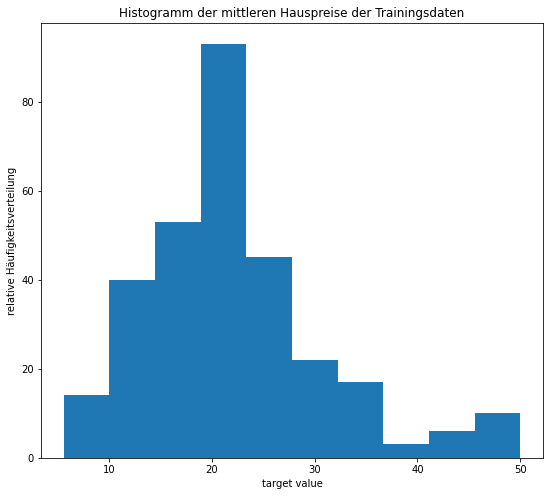

In [5]:
####################
# explore trainingset
####################

# Häufigkeitsverteilung y (target)
fig = plt.figure(figsize=(9, 8))
plt.hist(y_train)
plt.xlabel('target value')
plt.ylabel('relative Häufigkeitsverteilung')
plt.title('Histogramm der mittleren Hauspreise der Trainingsdaten')
plt.show()

mean_train, std_train = [], []
coeffs = []

Abgebildet wird die Häufigkeitsverteilung des `targets`. Zu sehen ist, dass mehr als 50% der Hauspreise halb so teuer wie die teuersten Häuser sind. Es existieren aber mehr Hauspreise im teuersten Segment als in den etwas billigeren. Die Hauspreise nicht Normalverteilt.

Nachfolgend werden statistische Eigenschaften der anderen Features ermittelt.

CRIM (0):


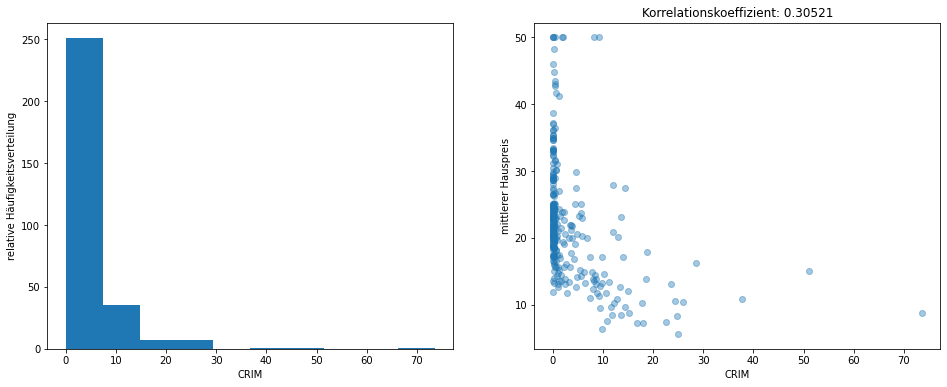

rows = 303
all numeric = True (float64)
mean = 3.4356432013201323
std = 7.518031409280581
corrcoef = 0.30520630774825896 
 

ZN (1):


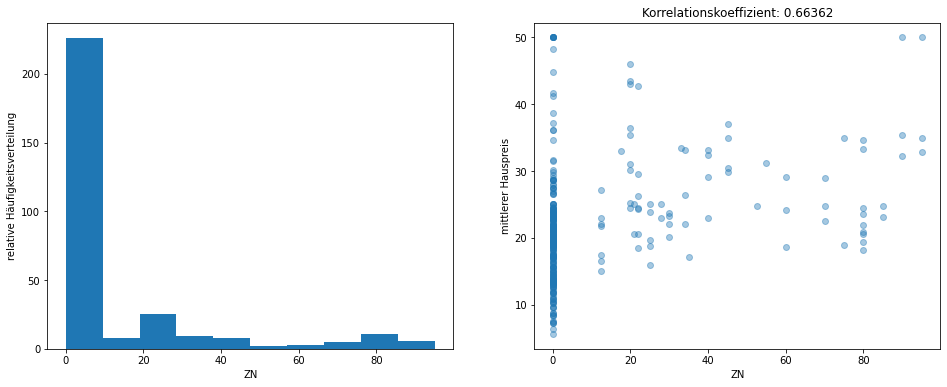

rows = 303
all numeric = True (float64)
mean = 11.169966996699669
std = 23.406051000355742
corrcoef = 0.6636215238900296 
 

INDUS (2):


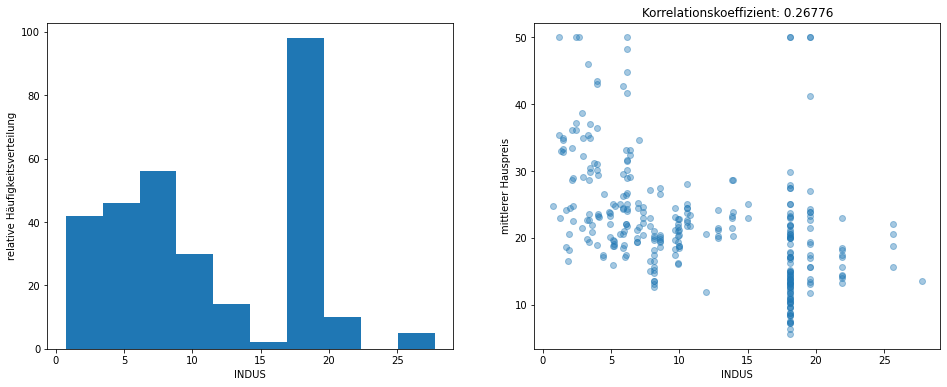

rows = 303
all numeric = True (float64)
mean = 11.282046204620462
std = 6.652444433075623
corrcoef = 0.2677622341130751 
 

CHAS (3):


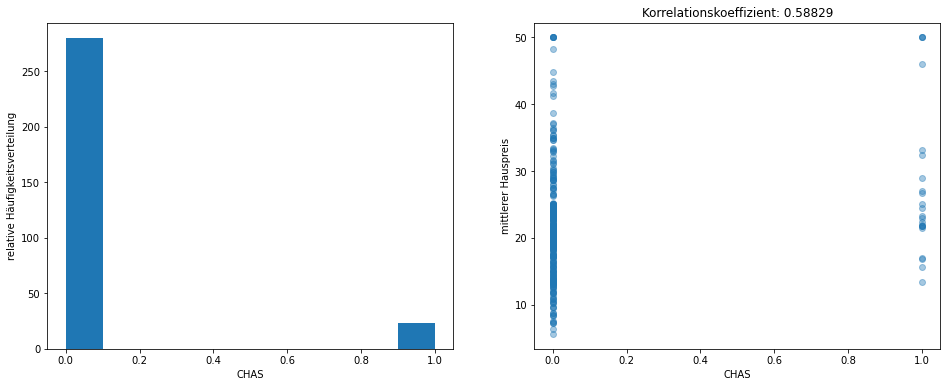

rows = 303
all numeric = True (float64)
mean = 0.07590759075907591
std = 0.2648501999701502
corrcoef = 0.5882863996365613 
 

NOX (4):


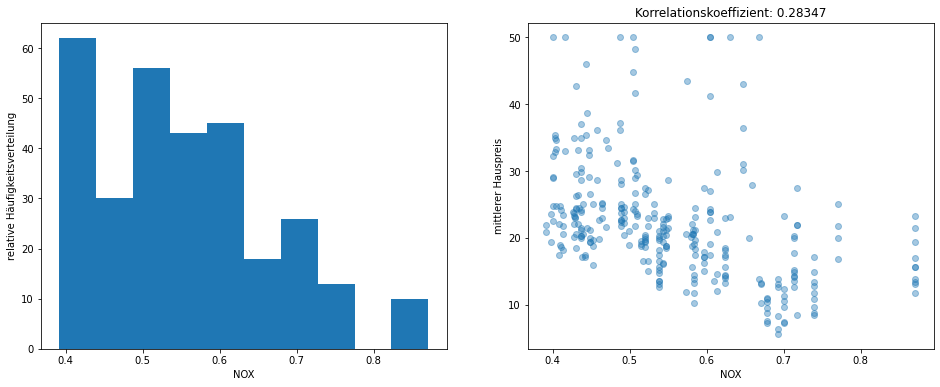

rows = 303
all numeric = True (float64)
mean = 0.5539237623762376
std = 0.11526728429215616
corrcoef = 0.28346917974817737 
 

RM (5):


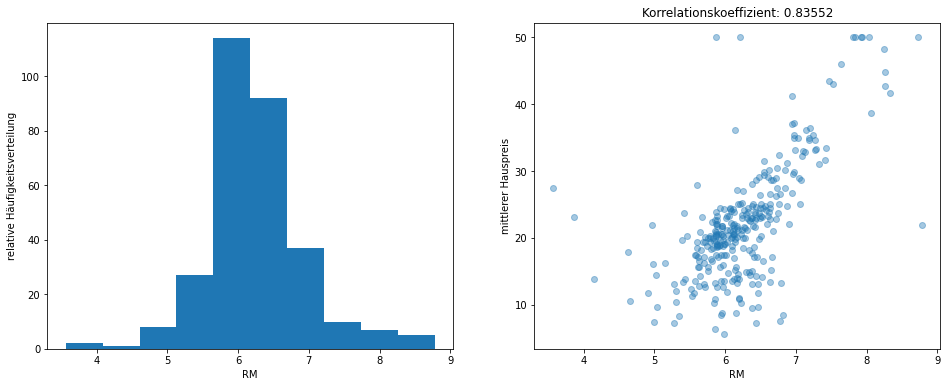

rows = 303
all numeric = True (float64)
mean = 6.255264026402641
std = 0.6846297085876553
corrcoef = 0.8355223228648916 
 

AGE (6):


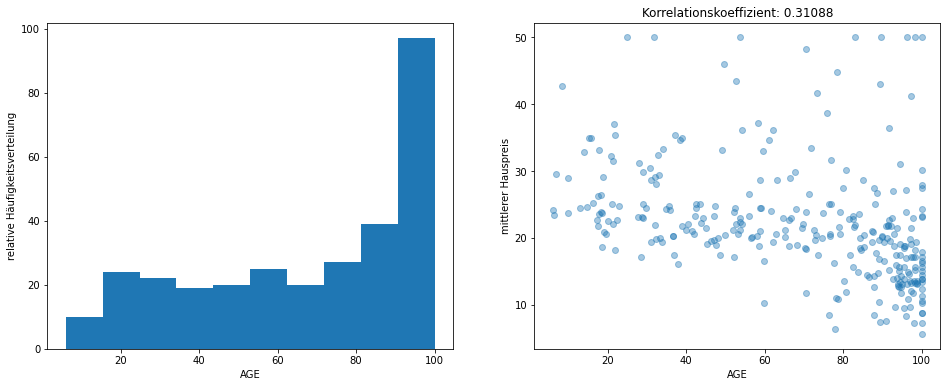

rows = 303
all numeric = True (float64)
mean = 67.85478547854785
std = 28.321687602442587
corrcoef = 0.31087827457351036 
 

DIS (7):


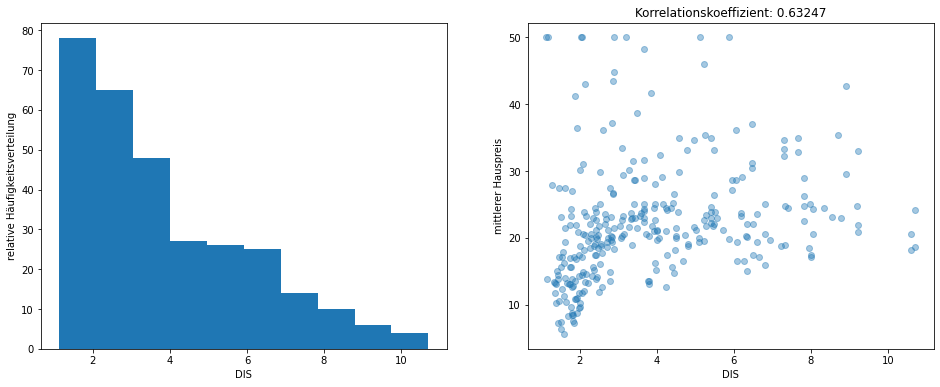

rows = 303
all numeric = True (float64)
mean = 3.8608336633663374
std = 2.187001379767375
corrcoef = 0.6324714941217764 
 

RAD (8):


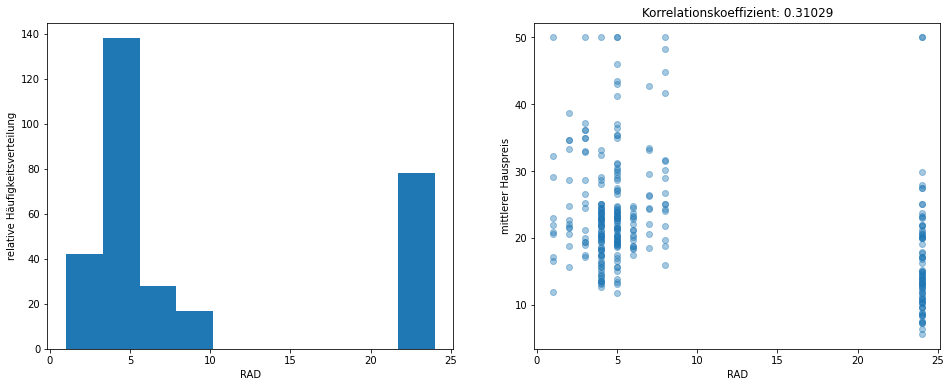

rows = 303
all numeric = True (float64)
mean = 9.58085808580858
std = 8.604582587662993
corrcoef = 0.3102933463839993 
 

TAX (9):


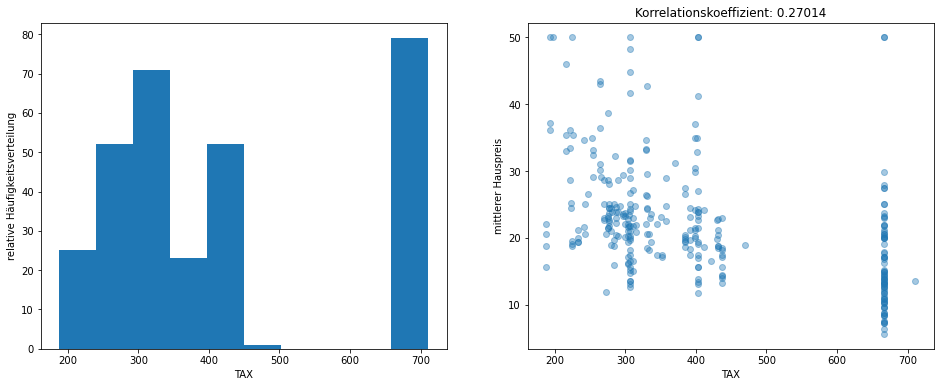

rows = 303
all numeric = True (float64)
mean = 412.1848184818482
std = 161.59712005003493
corrcoef = 0.27014263496166513 
 

PTRATIO (10):


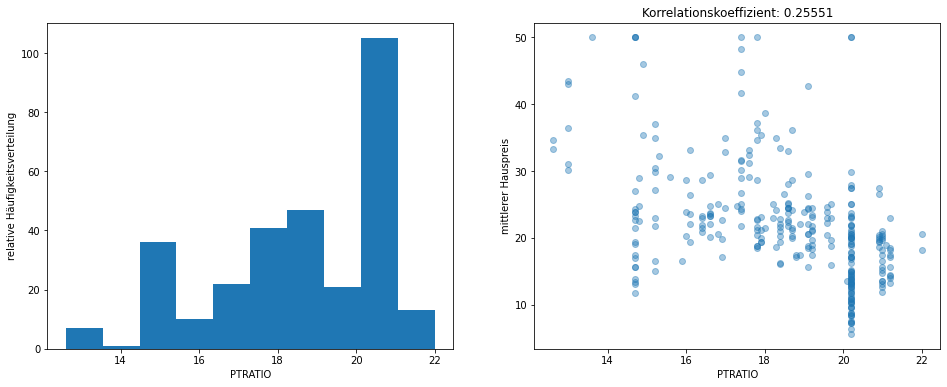

rows = 303
all numeric = True (float64)
mean = 18.463696369636963
std = 2.150447539625157
corrcoef = 0.25550873357000725 
 

B (11):


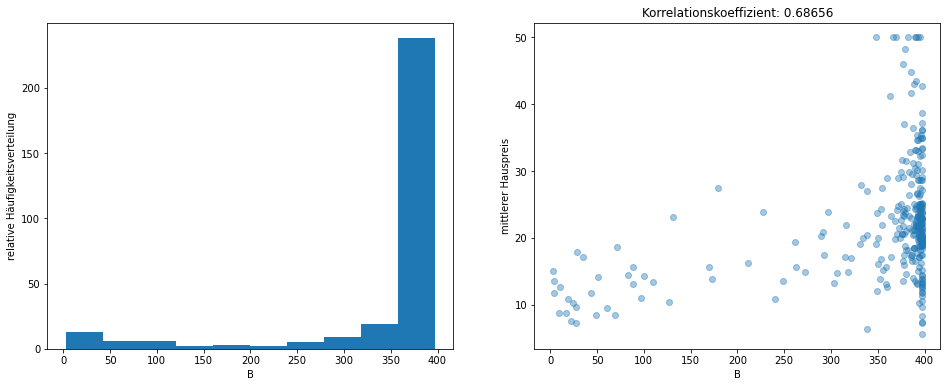

rows = 303
all numeric = True (float64)
mean = 348.95326732673266
std = 100.08127865314935
corrcoef = 0.6865580061603127 
 

LSTAT (12):


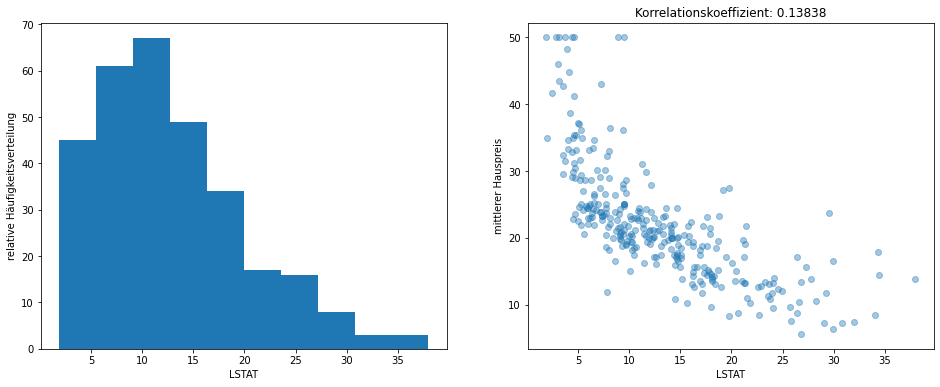

rows = 303
all numeric = True (float64)
mean = 12.835841584158416
std = 7.075008159949588
corrcoef = 0.13838135316539715 
 



In [6]:
for ind, col in enumerate(X_train.T):
    # print(df[col].describe())
    mean, std = lr.StandardScaler_fit(col)
    mean_train.append(mean)
    std_train.append(std)
    print(f'{features[ind]} ({ind}):')
    fig1 = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2)
    ax = plt.subplot(gs[0])
    ax.set_xlabel(features[ind])
    ax.set_ylabel("relative Häufigkeitsverteilung")
    ax.set_title("")
    plt.hist(col)
    ##
    ##
    ax2 = plt.subplot(gs[1])
    ax2.set_xlabel(features[ind])
    ax2.set_ylabel("mittlerer Hauspreis")
    plt.scatter(col, y_train, alpha=0.4, )
    ##
    coeff = np.mean(np.corrcoef(col, y_train.T))
    coeffs.append(coeff)
    ax2.set_title("Korrelationskoeffizient: {0:.5f}".format(coeff))
    plt.show()

    #Feature beschreiben
    print(f'rows = {np.size(col)}\nall numeric = {not np.isnan(col).any()} ({col.dtype})\nmean = {mean}\nstd = {std}\ncorrcoef = {coeff}', '\n', '\n')


Zu sehen ist, dass die einzelnen Features allesamt unterschiedlich skaliert sind und in ihrer Häufigkeitsverteilung bis auf das Feature `RM` nicht Normalverteilt sind.

Bei `RAD` und `CHAS` handelt es sich offensichtlich um kategorische Features. Häuser mit einem hohen mittleren Preis haben allesamt einen niedirgen Wert bei `LSTAT` sowie einen hohen Wert bei `B`.

Ein hoher Korrelationskoeffizient deutet auf einen linearen Zusammenhang zwischen einem Feature und dem target hin. Also wie sehr erklärt das eine Feature das target. Insgesammt wird das target aber eher durch die Kombination mehrer Fetures erklärt.

Besteht ein deutlicher linearer Zusammenhang zwischen zwei Features bietet es sich ggf. an diese zu kombinieren um die Dimensionalität des Datensets zu reduzieren. Dies wurde aber nicht untersucht.

**Berechnung der optimalen Parameter**

Um Überanpassung vorzubeugen wird ein Modell reguliert. Der Regulierungsfaktor `alpha` wird per Kreuzvalidierungsverfahren ermittelt um einen aussagekräftigen Wert zu ermitteln. Dies wird für beide Polynomengrade getan, um das bessere Modell zu ermitteln.

Für eine kompaktere Darstellung wird hier der `rmse` gegen `alpha` illustriert.

In [12]:
#############################################
# Kreuzvalidierung
alpha2, mse2 = crossval(X_train,y_train, 2, 5)
alpha, mse = crossval(X_train,y_train, 1, 5)

In [13]:
alpha2_min_mse = alpha2[np.argmin(mse2)]
alpha_min_mse = alpha[np.argmin(mse)]

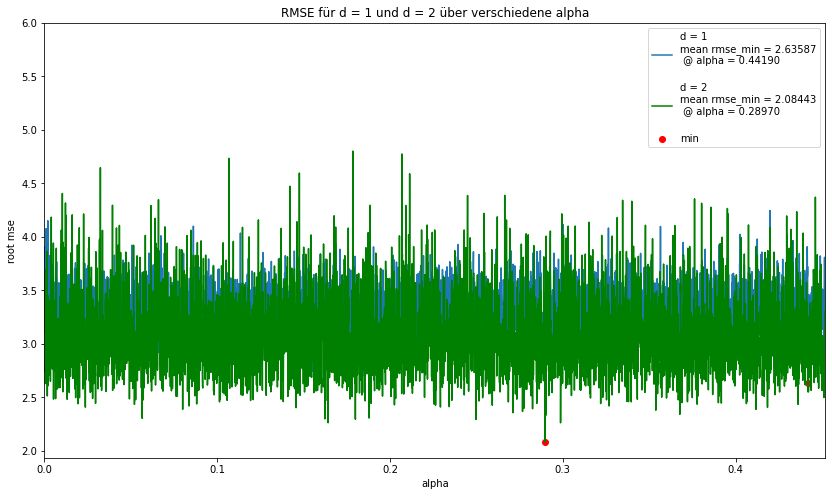

In [14]:
fig = plt.figure(figsize=(14, 8))

plt.plot(alpha,np.sqrt(mse), label=f'd = 1\nmean rmse_min = {np.min(np.sqrt(mse)):.5f}\n @ alpha = {alpha_min_mse:.5f}\n')
plt.plot(alpha2,np.sqrt(mse2), label=f'd = 2\nmean rmse_min = {np.min(np.sqrt(mse2)):.5f}\n @ alpha = {alpha2_min_mse:.5f}\n', color='g')
plt.scatter(alpha2_min_mse, np.min(np.sqrt(mse2)), color='r', marker='o', label='min')
plt.scatter(alpha_min_mse, np.min(np.sqrt(mse)), color='r', marker='o')

plt.xlabel('alpha')
plt.ylim(np.min(np.sqrt(mse2))-0.15,6)
plt.xlim(0, max(alpha_min_mse, alpha2_min_mse)+0.01)
plt.ylabel('root mse')
plt.legend()
plt.title('RMSE für d = 1 und d = 2 über verschiedene alpha')
plt.show()

Zu sehen ist, bei welchem `alpha > 0 ` der `rmse` den geringsten Wert annimmt, wobei anzumerken ist, dass `alpha` bei jedem Iterationsschritt um `0.0001` erhöht wird, da die Berechnungszeit aufgrund der Kreuzvalidierung zu hoch wäre. Eine andere Möglichkeit wäre, die verwendeten `alpha` in einem sehr geringen Intervall einzugrenzen und nur dieses Intervall iterativ anzupassen.

Das Lineare modell mit polynomialen Features erreicht einen geringeren `rmse` und gilt somit als das aussagekräftigere Modell.

**Modelle mit den optimalen Parametern**

Nachfolgend werden für das Lineare Modell, sowie für das Lineare Modell mit polynomialen Features mit den ermittelten `alpha` erstellt und dargestellt.


In [16]:
#############################################
# Hyperparameter
#############################################

# welche Spalte soll geplottet werden
column_to_plot = 5

# Hyperparameter im Format [Polynomengrad, alpha, groesse des trainingset]
hyperparameter = [[1, alpha_min_mse, len(y_train)],
                  [2, alpha2_min_mse, len(y_train)]]

In [17]:
#Traiiningsset und Vaidierungsset zusammenkleben
X_train = np.vstack((X_train, X_val))
y_train = np.hstack((y_train, y_val))

print(X_train.shape,y_train.shape)

(507, 13) (507,)


###############
calculating for:
polynomialdegree = 1
alpha = 0.4419001
trainingsetsize = (405, 13)...

theta calculated!
with 14 coefficients

validation on testdata ((101, 13)):
r2 = 0.7223033057298611
mse = 15.986640713293292

###############
calculating for:
polynomialdegree = 2
alpha = 0.2897001
trainingsetsize = (405, 13)...

theta calculated!
with 105 coefficients

validation on testdata ((101, 104)):
r2 = 0.9252788956054052
mse = 4.301597657820295

############### 

plotting RM (5) traindata and predicted testdata now...


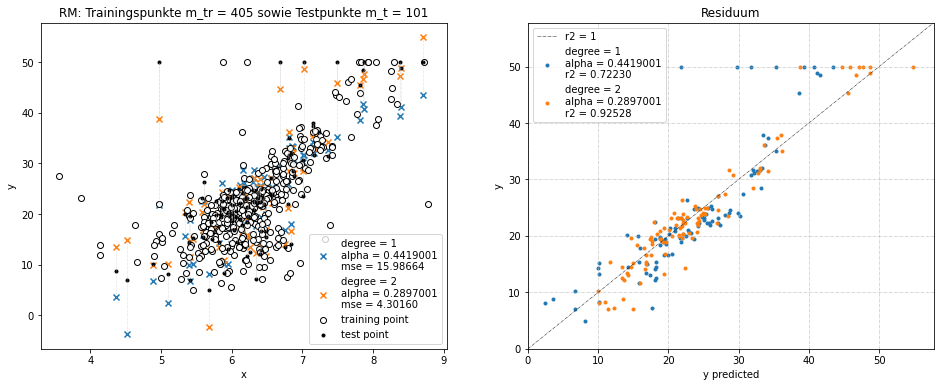

In [18]:
# plotten
hyperparameter, r2_score_ridge, mse_test, mse_train, cost, theta_ridge = linear(hyperparameter)

Auf der linken Seite werden für das ausgewählte Feature die Trainingsdaten, die originalen Testdaten und die von den Modellen vorhergesagten Testdaten illustriert. Die Linie zwischen den Punkten stellt den Fehler der Prediction dar.

Auf der rechten Seite werden die Vrohergesagten Testdaten gegen die originalen Testdaten Illustriert. Punkte, welche auf der Diagonalen liegen wurden korrekt Vorhergesagt.

Zu sehen ist, wie bereits vorher ermittelt, dass das lineare Modell (blau) dem linearen Modell mit polynomialen Features (orange) in seiner Aussagekraft unterlegen ist. Besonders in dei Vorhersagunen von hohen Hauspreisen ist das einfache lineare Modell (blau) unterlegen.

**Lernkurve**

Die Lernekurve ist ein nützliches Werkzeug um die Aussagefähigkeit eines Machine Learning Modelles auszuwerten. Es kann abgelesen werden ob das Modell für die vorhandenen Datensätze über- oder unterangepasst ist, indem sukzesiv die Anzahl der Trainingsdatensätze erhöht wird und der resultierende Fehler für die Trainingsdaten als auch die Testdaten abgelesen wird.

Für eine kompaktere Darstellung wird hier der `rmse` gegen die Anzahl der Traininsdatensätze illustriert.

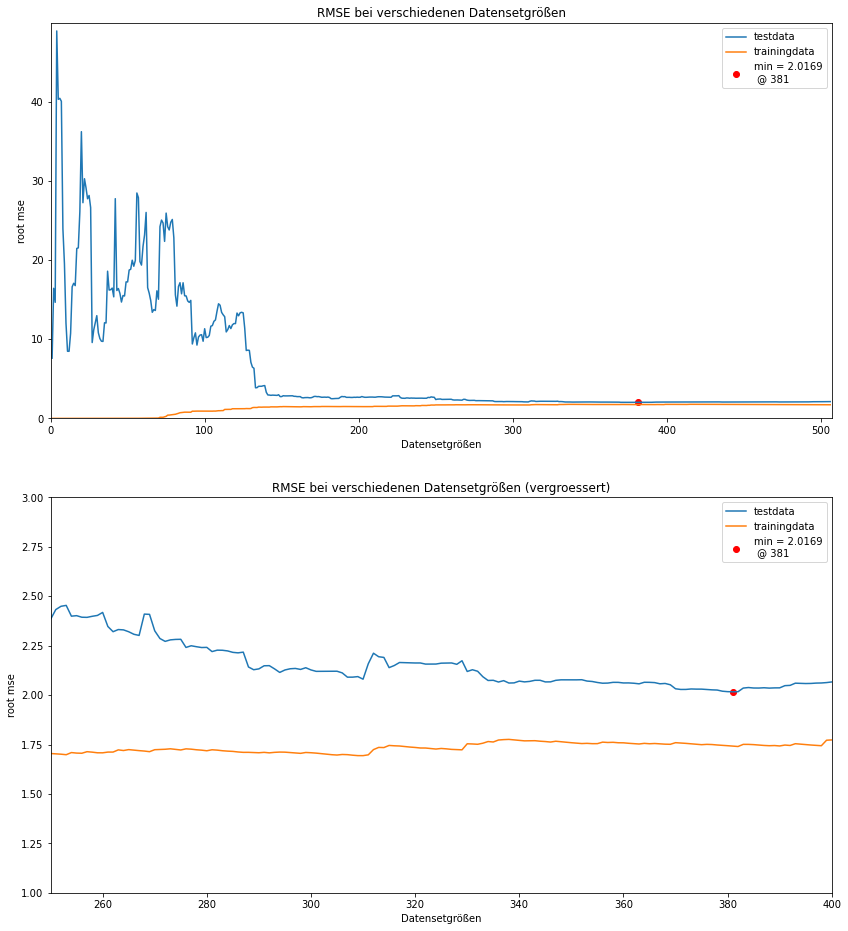

In [19]:
plotlearningcurve(2, alpha2_min_mse, len(y_train), 'Datensetgrößen')

Zu sehen ist, dass der `rmse` der Validierung mit den Testdaten bei zunehmender Größe des Trainingssets sinkt. Der `rmse` der Validierung mit den Trainingsdaten ist bis zu einer bestimmten Grenze ~0, da das entstandene Modell nicht komplex genug ist um um wirkliche Verhersagungen zu treffen, bzw. sich zu sehr an die Trainingsdaten angepasst hat (overfitting). 
Ab ca. 150 Trainingsdatensätzen hat sich das Modell gut angepasst, was daran zu erkennen ist, dass der `rmse` der Vorhersagungen der Tesdaten sich dem `rmse`der Vorhersagungen der Trainingsdaten annähert. 

**Verbesserungsansätze**

Um die Aussagefähigkeit der Modell zu verbessern, müssen in erster Linie das Datenset transformiert werden. Eine Möglichkeit wäre, die einzelnen Features zunächst zu normalisieren, also auf ein Intervall [0,1] zu skalieren. Eine andere Möglichkeit wäre mit verschiedenen Featurekombinationen zu experimentieren, oder gar Features auszulassen bzw. neue zu beziehen.